In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import heapq
from sklearn.model_selection import train_test_split


In [42]:
def d(a, b):
    return np.sqrt((a - b) @ (a - b))

In [4]:
iris = sns.load_dataset("iris").dropna()


In [45]:
def nearest_neighbors(X, y, x_n, K):
    distances = [(d(x, x_n), x, y) for x, y in zip(X, y)]
    distances.sort(key = lambda x : x[0])
    
    return distances[:K]

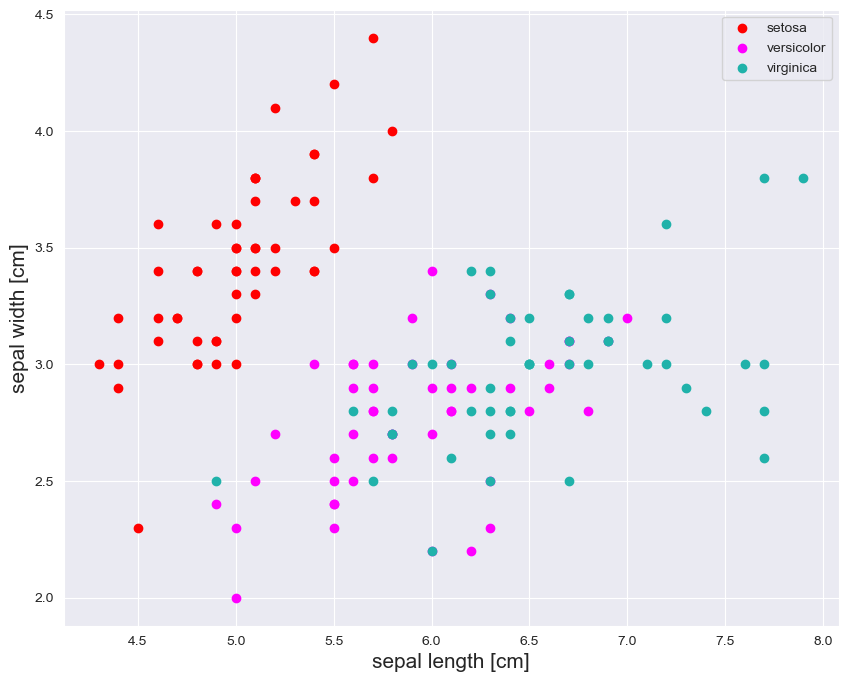

In [46]:
flowers = ["setosa", "versicolor", "virginica"]
colors = ["red", "magenta", "lightseagreen"]

fig, ax = plt.subplots(figsize = (10, 8))
for species, color in zip(flowers, colors):
    temp_df = iris[iris.species == species]
    ax.scatter(temp_df.sepal_length,
               temp_df.sepal_width,
               c = color,
               label = species, 
               )
    
ax.set_xlabel("sepal length [cm]", fontsize = 15)
ax.set_ylabel("sepal width [cm]", fontsize = 15)
ax.legend()
plt.show()

In [44]:
X = iris[["petal_length",
          "petal_width"]].to_numpy()

y = iris["species"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.33, 
                                                    random_state=1)

The distance between point 10 and 67 is 2.7202941017470885


In [47]:
def KNN(X, y, target, K=3, regression=False):
    neighbors = nearest_neighbors(X, y, target, K)
    if regression:
        return sum(x[2] for x in neighbors) / K
    else: 
        labels = [n[2] for n in neighbors]
        return max(labels, key = labels.count)

In [48]:
KNN(X_train, y_train, X_test[20], 5)

'versicolor'

In [49]:
def classification_error(test_features, 
                         test_labels,
                         training_features, 
                         training_labels,
                         k):
    error = 0
    for point, label in zip(test_features, test_labels):
        error += label != KNN(training_features, training_labels, point, k)
    return error/len(test_features)

In [50]:
classification_error(X_test, y_test, X_train, y_train, 10)

0.04

In [51]:
possible_k = [k for k in range(3, 26, 2)]
errors = [classification_error(X_test,
                               y_test,
                               X_train,
                               y_train, k) for k in possible_k]

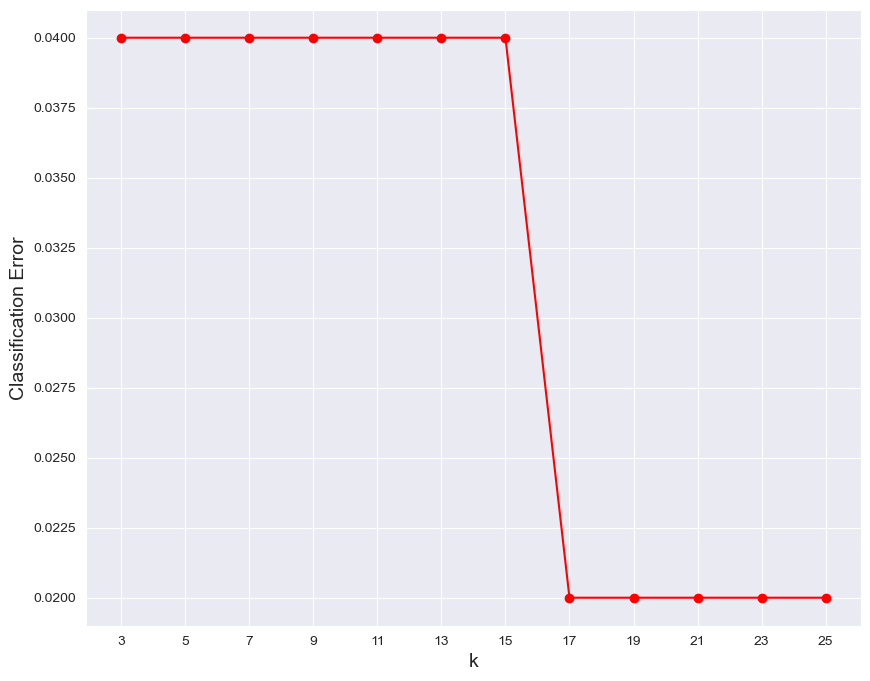

In [52]:
plt.figure(figsize = (10, 8))
plt.plot(possible_k, errors, color = 'red', marker = "o")
plt.xlabel('k', fontsize = 14)
plt.ylabel('Classification Error', fontsize = 14)
plt.xticks(possible_k)
plt.show()